# 读和写文件

open() 将会返回一个 file 对象，基本语法格式如下:

```py
open(filename, mode)
```

- filename：包含了你要访问的文件名称的字符串值。
- mode：决定了打开文件的模式：只读，写入，追加等。所有可取值见如下的完全列表。这个参数是非强制的，默认文件访问模式为只读(r)。

不同模式打开文件的完全列表：

|模式|	描述|
|:----|:----|
|r|    以只读方式打开文件。文件的指针将会放在文件的开头。这是默认模式。|
|rb|	以二进制格式打开一个文件用于只读。文件指针将会放在文件的开头。|
|r+|	打开一个文件用于读写。文件指针将会放在文件的开头。|
|rb+|	以二进制格式打开一个文件用于读写。文件指针将会放在文件的开头。|
|w|	打开一个文件只用于写入。如果该文件已存在则打开文件，并从开头开始编辑，即原有内容会被删除。如果该文件不存在，创建新文件。|
|wb|	以二进制格式打开一个文件只用于写入。如果该文件已存在则打开文件，并从开头开始编辑，即原有内容会被删除。如果该文件不存在，创建新文件。|
|w+|	打开一个文件用于读写。如果该文件已存在则打开文件，并从开头开始编辑，即原有内容会被删除。如果该文件不存在，创建新文件。|
|wb+|	以二进制格式打开一个文件用于读写。如果该文件已存在则打开文件，并从开头开始编辑，即原有内容会被删除。如果该文件不存在，创建新文件。|
|a|	打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。也就是说，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入。|
|ab|	以二进制格式打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。也就是说，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入。|
|a+|	打开一个文件用于读写。如果该文件已存在，文件指针将会放在文件的结尾。文件打开时会是追加模式。如果该文件不存在，创建新文件用于读写。|
|ab+|	以二进制格式打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。如果该文件不存在，创建新文件用于读写。|

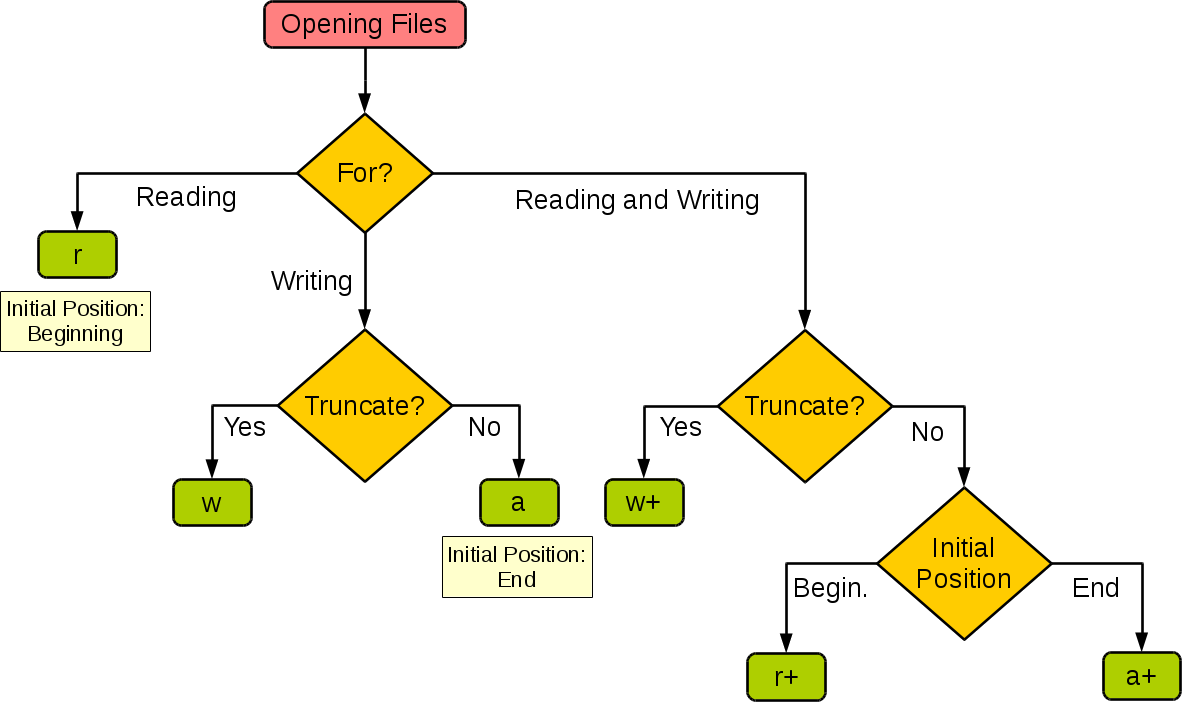

|模式|	r|	r+|	w|	w+|	a|	a+|
|:---|:---|:---|:---|:---|:---|:---|
|读|	+|	+|	 |	+|	 |	+|
|写|	 |	+|	+|	+|	+|	+|
|创建|	|	|	+|	+|	+|	+|
|覆盖|	|	|	+|	+|	|	|
|指针在开始|	+|	+|	+|	+|	|	|
|指针在结尾|	|	|	|	|	+|	+|

# 简单联系人信息管理

In [1]:
import pickle
import os

datafile = 'person.data'
line = '======================================='
message = '''
=======================================
Welcome bookmark:
    press 1 to show list
    press 2 to add pepole
    press 3 to edit pepole
    press 4 to delete pepole
    press 5 to search pepole
    press 6 to show menu
    press 0 to quit
=======================================
'''
print(message)

class Person(object):
    """通讯录联系人"""
    def __init__(self, name, number):
        self.name = name
        self.number = number

# 获取数据
def get_data(filename=datafile):
    # 文件存在且不为空
    if os.path.exists(filename) and os.path.getsize(filename):
        with open(filename,'rb') as f:
            return pickle.load(f)
    return None
        
# 写入数据
def set_data(name, number, filename=datafile):

    personList = {} if get_data() == None else get_data()

    with open(filename,'wb') as f:
        personList[name] = Person(name,number)
        pickle.dump(personList,f)

# 保存字典格式的数据到文件
def save_data(dictPerson, filename=datafile):
    with open(filename,'wb') as f:
        pickle.dump(dictPerson,f)

# 显示所有联系人
def show_all():
    personList = get_data()
    if personList:
        for v in personList.values():
            print(v.name,v.number)
        print(line)
    else:
        print('not yet person,please add person')
        print(line)

# 添加联系人
def add_person(name,number):
    set_data(name,number)
    print('success add person')
    print(line)

# 编辑联系人
def edit_person(name,number):
    personList = get_data()
    if personList:
        personList[name] = Person(name,number)
        save_data(personList)
        print('success edit person')
        print(line)

# 删除联系人
def delete_person(name):
    personList = get_data()
    if personList:
        if name in personList:
            del personList[name]
            save_data(personList)
            print('success delete person')
        else:
            print(name,' is not exists in dict')
        print(line)


# 搜索联系人
def search_person(name):
    personList = get_data()
    if personList:
        if name in personList.keys():
            print(personList.get(name).name, personList.get(name).number)
        else:
            print('No this person of ',name)
        print(line)
        

while True:
    num = input('>>')

    if num == '1':
        print('show all personList:')
        show_all()
    elif num == '2':
        print('add person:')    
        name = input('input name>>')
        number = input('input number>>')
        add_person(name,number)
    elif num == '3':
        print('edit person:')
        name = input('input name>>')
        number = input('input number>>')
        edit_person(name,number)
    elif num == '4':
        print('delete person:')
        name = input('input name>>')
        delete_person(name)
    elif num == '5':
        print('search :')
        name = input('input name>>')
        search_person(name)
    elif num == '6':
        print(message)
    elif num == '0':
        break
    else:
        print('input error, please retry')


Welcome bookmark:
    press 1 to show list
    press 2 to add pepole
    press 3 to edit pepole
    press 4 to delete pepole
    press 5 to search pepole
    press 6 to show menu
    press 0 to quit

>>1
show all personList:
not yet person,please add person
>>2
add person:
input name>>anlzou
input number>>01
success add person
>>1
show all personList:
anlzou 01
>>4
delete person:
input name>>anlzou
success delete person
>>
input error, please retry
>>0
